<a href="https://colab.research.google.com/github/sakthi1024/DSA0405-FOD/blob/main/DAY_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

21. Scenario: You are working on a dataset that contains information about various types of
fruits. The dataset includes features such as weight, color, and texture of the fruit. Your task is to
build a k-Nearest Neighbors (kNN) classifier to predict the type of fruit based on these features.

Question: Given a dataset with features like 'weight', 'color', and 'texture' of fruits, and their
respective 'type' (e.g., apple, orange, banana), how would you implement a k-Nearest Neighbors
classifier to predict the type of an unknown fruit based on its 'weight', 'color', and 'texture'
features? Additionally, discuss the process of choosing the optimal value of 'k' and handling
categorical features (like 'color' or 'type') in a kNN classifier

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


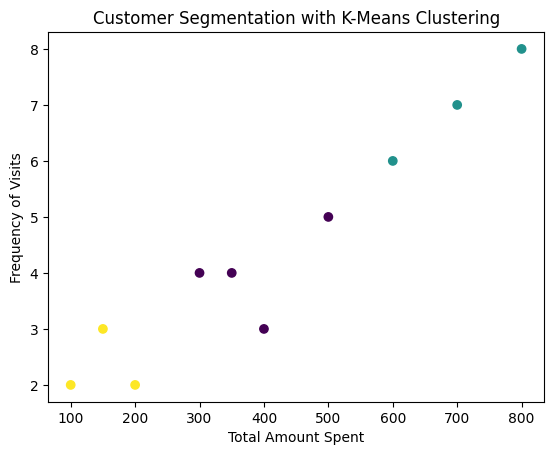

Cluster Centers:
   TotalAmountSpent  FrequencyOfVisits
0             387.5           4.000000
1             700.0           7.000000
2             150.0           2.333333


In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
data = {
    'CustomerID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'TotalAmountSpent': [100, 300, 150, 500, 200, 600, 350, 800, 400, 700],
    'FrequencyOfVisits': [2, 4, 3, 5, 2, 6, 4, 8, 3, 7]
}
df = pd.DataFrame(data)
X = df[['TotalAmountSpent', 'FrequencyOfVisits']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
num_clusters = 3
kmeans_model = KMeans(n_clusters=num_clusters, random_state=42)
df['Cluster'] = kmeans_model.fit_predict(X_scaled)
plt.scatter(df['TotalAmountSpent'], df['FrequencyOfVisits'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Total Amount Spent')
plt.ylabel('Frequency of Visits')
plt.title('Customer Segmentation with K-Means Clustering')
plt.show()
cluster_centers = scaler.inverse_transform(kmeans_model.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=['TotalAmountSpent', 'FrequencyOfVisits'])
print("Cluster Centers:")
print(cluster_centers_df)


22. Scenario: You are tasked with implementing a decision tree classifier in Python to predict
whether an online shopper will make a purchase on an e-commerce platform. The dataset
provided includes attributes such as 'age', 'income', 'browsing_duration', 'device_type', and the
target variable 'purchase' (indicating whether a purchase was made or not).

Question: Given the dataset with the mentioned attributes and the 'purchase' label, how would
you use Python's scikit-learn library to create a decision tree classifier? Provide code to
preprocess categorical variables like 'device_type' for model training and predict whether a new
customer, with specific 'age', 'income', 'browsing_duration', and 'device_type', is likely to make a
purchase or not.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import pandas as pd

data = {
    'age': [25, 30, 35, 40, 45],
    'income': ['low', 'medium', 'high', 'medium', 'low'],
    'browsing_duration': [20, 15, 40, 30, 25],
    'device_type': ['mobile', 'desktop', 'tablet', 'mobile', 'desktop'],
    'purchase': [1, 0, 1, 0, 1]  # 1 represents purchase, 0 represents no purchase
}

df = pd.DataFrame(data)

X = df.drop('purchase', axis=1)
y = df['purchase']


categorical_cols = ['income', 'device_type']


preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), categorical_cols)
    ],
    remainder='passthrough'
)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)


clf = DecisionTreeClassifier()
clf.fit(X_train_encoded, y_train)

new_customer = pd.DataFrame({
    'age': [28],
    'income': ['medium'],
    'browsing_duration': [25],
    'device_type': ['mobile']
})

new_customer_encoded = preprocessor.transform(new_customer)

prediction = clf.predict(new_customer_encoded)
if prediction[0] == 1:
    print("The new customer is likely to make a purchase.")
else:
    print("The new customer is not likely to make a purchase.")


The new customer is not likely to make a purchase.


23. Scenario: You work for a financial institution, and your task is to develop a classification
model to assess the credit risk associated with loan applicants. The dataset provided contains
various attributes such as income, credit score, debt-to-income ratio, employment duration, and
the final 'risk' label indicating whether an applicant is high-risk or low-risk for a loan.

Question: Using the Classification and Regression Trees (CART) algorithm in Python, build a
predictive model to evaluate the credit risk of loan applicants based on features like 'income',
'credit score', 'debt-to-income ratio', and 'employment duration'? Provide a Python code that
preprocesses the data, builds a CART classifier, and predicts the credit risk level for a new loan
applicant with specific attribute values

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder


df = pd.read_csv('income.csv')


label_encoder = LabelEncoder()
df['risk'] = label_encoder.fit_transform(df['risk'])

X = df[['income', 'credit_score', 'debt_to_income_ratio', 'employment_duration']]
y = df['risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


cart_classifier = DecisionTreeClassifier()


cart_classifier.fit(X_train, y_train)


y_pred = cart_classifier.predict(X_test)

accuracy = (y_pred == y_test).mean()
print(f"Accuracy: {accuracy:.2f}")


new_applicant_data = {'income': 62000, 'credit_score': 680, 'debt_to_income_ratio': 0.4, 'employment_duration': 1}
new_applicant_data = pd.DataFrame([new_applicant_data])

prediction = cart_classifier.predict(new_applicant_data)
predicted_risk = label_encoder.inverse_transform(prediction)[0]
print(f"The predicted credit risk level for the new applicant is: {predicted_risk}")

Accuracy: 1.00
The predicted credit risk level for the new applicant is: low


24. A company wants to know the most popular product they sell. They have a list of all the
products they have sold in the past year, along with the number of times each product was sold.
Write a program that will calculate the frequency distribution of products sold and print out the
most popular product

In [ ]:
import pandas as pd

data = {
    'product_name': ['Product A', 'Product B', 'Product A', 'Product C', 'Product A', 'Product B'],
    'quantity_sold': [10, 15, 8, 20, 12, 18]
}

product_sales = pd.DataFrame(data)

product_frequency = product_sales.groupby('product_name')['quantity_sold'].sum()


print("Frequency Distribution of Products Sold:")
print(product_frequency)


most_popular_product = product_frequency.idxmax()
max_quantity_sold = product_frequency.max()

print(f"\nThe most popular product is '{most_popular_product}' with {max_quantity_sold} units sold.")


Frequency Distribution of Products Sold:
product_name
Product A    30
Product B    33
Product C    20
Name: quantity_sold, dtype: int64

The most popular product is 'Product B' with 33 units sold.


25. Given a dataset, write a program to perform estimation techniques such as mean estimation,
variance estimation, and sampling techniques to infer population characteristics.

In [ ]:
import pandas as pd
import numpy as np
data = {
    'value': np.random.randint(1, 100, 100)
}

df = pd.DataFrame(data)

mean_estimation = df['value'].mean()
print(f"Mean estimation: {mean_estimation:.2f}")

variance_estimation = df['value'].var()
print(f"Variance estimation: {variance_estimation:.2f}")
sample_size = 20
sample = df['value'].sample(n=sample_size, replace=False)
print(f"Random sample of size {sample_size}:")
print(sample)


Mean estimation: 50.99
Variance estimation: 909.00
Random sample of size 20:
0     63
72    69
82    23
75    90
5     86
30    19
10    15
26    52
44    58
37    90
54    63
97    80
69    47
63    86
56    22
55    69
41     9
89    19
3     58
53    64
Name: value, dtype: int64


26. A weather station wants to know if there is a correlation between the temperature and the
amount of rainfall in a city. They have data on the temperature and rainfall each day for the past
year in that city. Write a program that will calculate the correlation coefficient between
temperature and rainfall, and create a scatter plot of the data.

Correlation coefficient between temperature and rainfall: -0.03


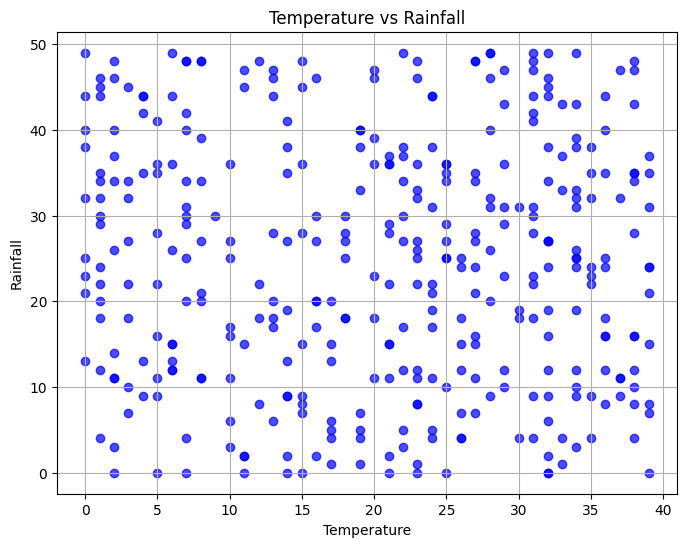

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
days = 365
temperature = np.random.randint(0, 40, days)
rainfall = np.random.randint(0, 50, days)
correlation_coefficient = np.corrcoef(temperature, rainfall)[0, 1]
print(f"Correlation coefficient between temperature and rainfall: {correlation_coefficient:.2f}")
plt.figure(figsize=(8, 6))
plt.scatter(temperature, rainfall, alpha=0.7, color='blue')
plt.title('Temperature vs Rainfall')
plt.xlabel('Temperature')
plt.ylabel('Rainfall')
plt.grid(True)
plt.show()


27. Scenario: Suppose you are a data analyst working for a marketing firm. The firm is
interested in estimating the average revenue generated from a recent marketing campaign
conducted on social media. You've collected a sample of the revenue generated by 100
customers who made purchases after clicking on the ads.

Question: Using Python, how would you calculate the confidence interval for the average
revenue from these 100 customers? Provide Python code that computes the confidence interval at
a specified confidence level (e.g., 95%) for the mean revenue.

In [ ]:
import numpy as np
from scipy import stats
np.random.seed(42)
revenue_sample = np.random.normal(loc=100, scale=20, size=100)

mean_revenue = np.mean(revenue_sample)
std_dev = np.std(revenue_sample, ddof=1)

confidence_level = 0.95

standard_error = std_dev / np.sqrt(len(revenue_sample))

degrees_of_freedom = len(revenue_sample) - 1
margin_of_error = stats.t.ppf(1 - (1 - confidence_level) / 2, degrees_of_freedom) * standard_error

lower_bound = mean_revenue - margin_of_error
upper_bound = mean_revenue + margin_of_error

print(f"Mean Revenue: {mean_revenue:.2f}")
print(f"Confidence Interval ({confidence_level * 100}%): ({lower_bound:.2f}, {upper_bound:.2f})")


Mean Revenue: 97.92
Confidence Interval (95.0%): (94.32, 101.53)


28. Consider a sample car dataset and plot Mutlivariate graphs to show the distribution of data
from multiple variables for Multivariate Scatterplot and Scatter Plot Matrix

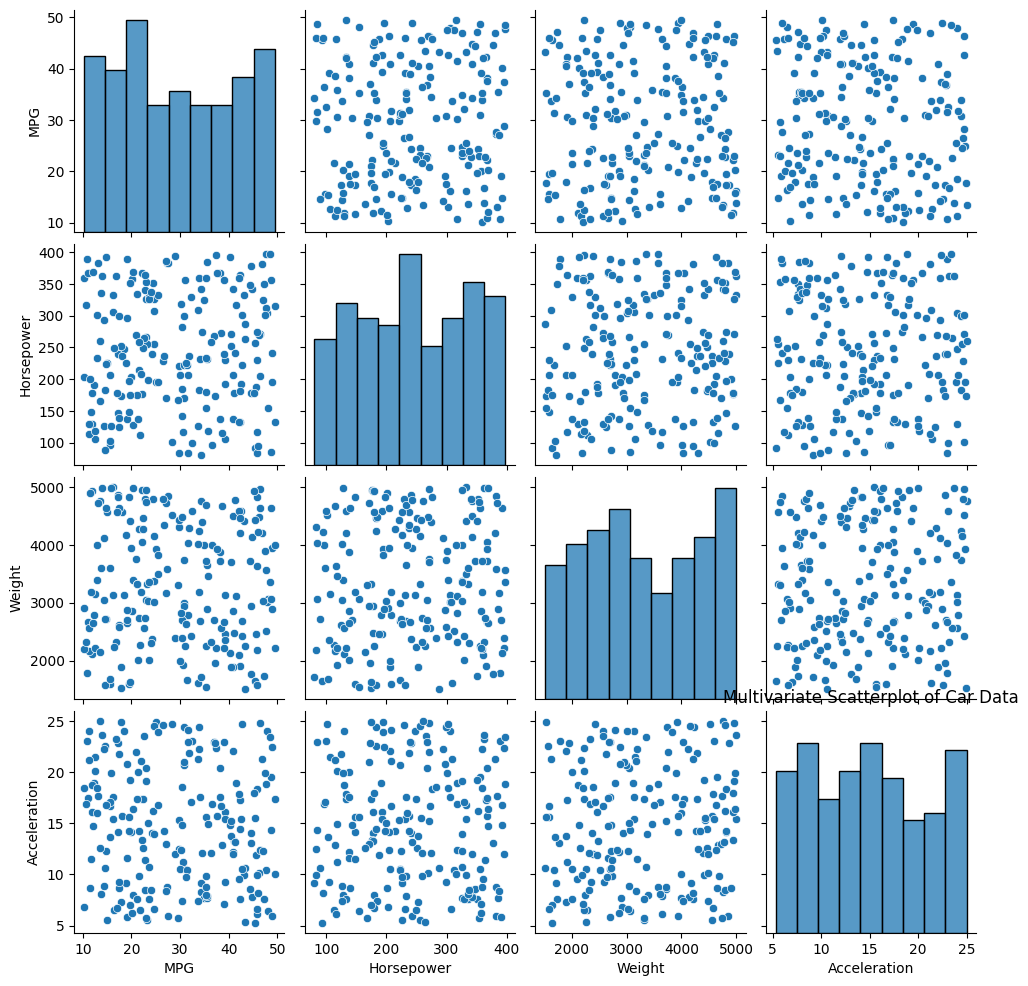

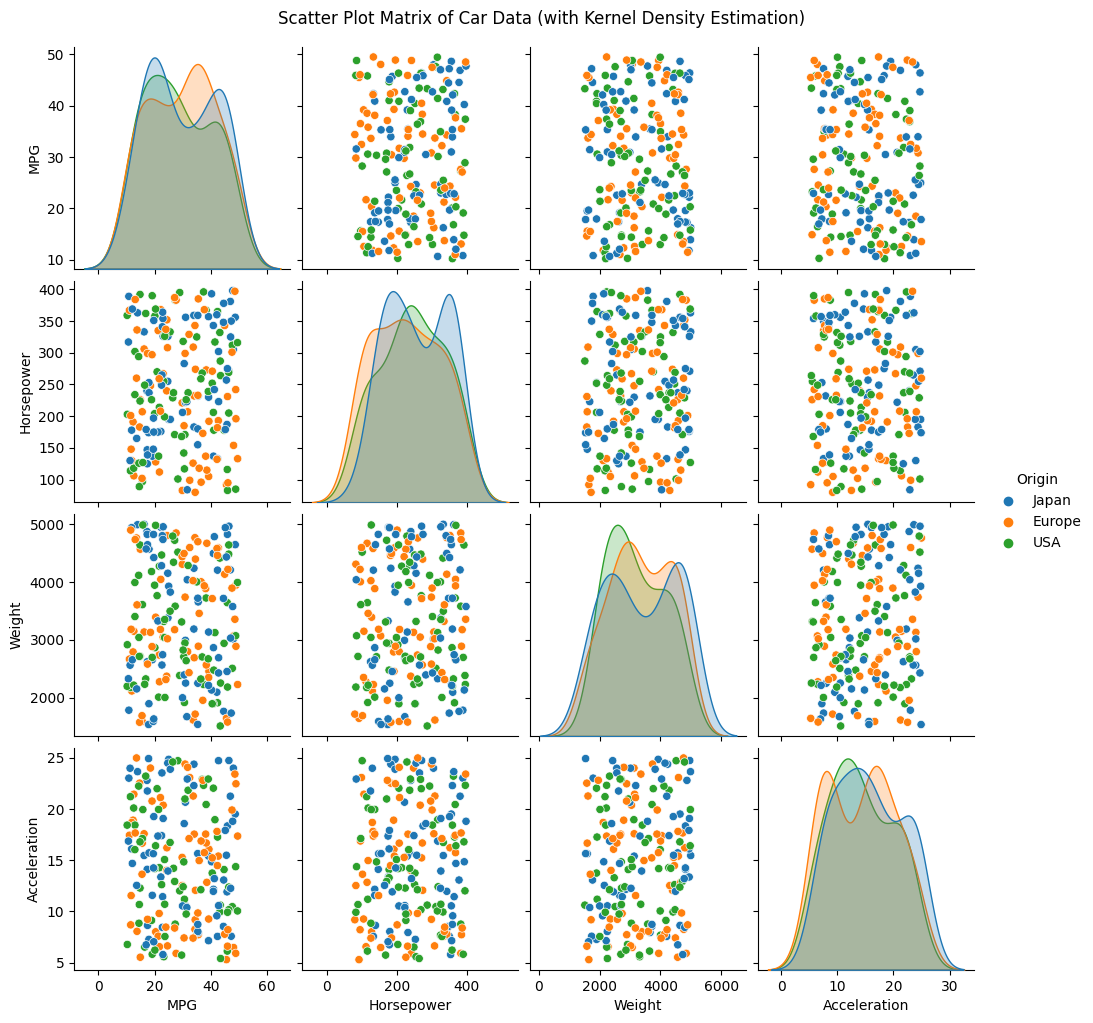

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


np.random.seed(42)
num_samples = 200


mpg = np.random.uniform(10, 50, num_samples)
horsepower = np.random.randint(80, 400, num_samples)
weight = np.random.randint(1500, 5000, num_samples)
acceleration = np.random.uniform(5, 25, num_samples)
origin = np.random.choice(['USA', 'Europe', 'Japan'], num_samples)

data = {
    'MPG': mpg,
    'Horsepower': horsepower,
    'Weight': weight,
    'Acceleration': acceleration,
    'Origin': origin
}

car_data = pd.DataFrame(data)

sns.pairplot(car_data)
plt.title('Multivariate Scatterplot of Car Data')
plt.show()

sns.pairplot(car_data, hue='Origin', diag_kind='kde')
plt.suptitle('Scatter Plot Matrix of Car Data (with Kernel Density Estimation)', y=1.02)
plt.show()


29. Imagine you are an analyst for a popular online shopping website. Your task is to analyze
customer reviews and provide insights on the average rating and customer satisfaction level for a
specific product category. You will use the pandas library to calculate confidence intervals to
estimate the true population mean rating. You have been provided with a CSV file named
"customer_reviews.csv," which contains customer ratings for products in the chosen category.

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import norm

df = pd.read_csv("Product,Rating.csv")
print("Sample of the Customer Reviews Dataset:")
print(df.head())

mean_rating = df['Rating'].mean()
std_dev_rating = df['Rating'].std()

standard_error = std_dev_rating / np.sqrt(len(df))

confidence_level = 0.95

z_score = norm.ppf((1 + confidence_level) / 2)
margin_of_error = z_score * standard_error

confidence_interval = (mean_rating - margin_of_error, mean_rating + margin_of_error)

print("\nResults:")
print(f"Mean Rating: {mean_rating:.2f}")
print(f"Standard Deviation: {std_dev_rating:.2f}")
print(f"Standard Error of the Mean: {standard_error:.2f}")
print(f"Confidence Interval ({confidence_level * 100}%): ({confidence_interval[0]:.2f}, {confidence_interval[1]:.2f})")

Sample of the Customer Reviews Dataset:
      Product  Rating
0      Laptop     4.5
1  Smartphone     3.8
2  Headphones     4.2
3      Tablet     5.0
4      Camera     3.5

Results:
Mean Rating: 4.17
Standard Deviation: 0.53
Standard Error of the Mean: 0.22
Confidence Interval (95.0%): (3.74, 4.59)


30. You are a data scientist working for a company that sells shoes. You are tasked with writing
a program that will calculate the frequency distribution of shoe sizes sold in the past year. The
data is stored in a file called shoe_sales.csv. The file contains the following columns: • shoe_size: The size of the shoe sold. • quantity: The number of shoes sold in that size.
Write a program that will read the data from the file and calculate the frequency distribution of
shoe sizes. The program should output the frequency distribution table, as well as a bar chart
showing the frequency of each shoe size

Frequency Distribution Table:
7     2
8     3
9     3
10    2
Name: shoe_size, dtype: int64


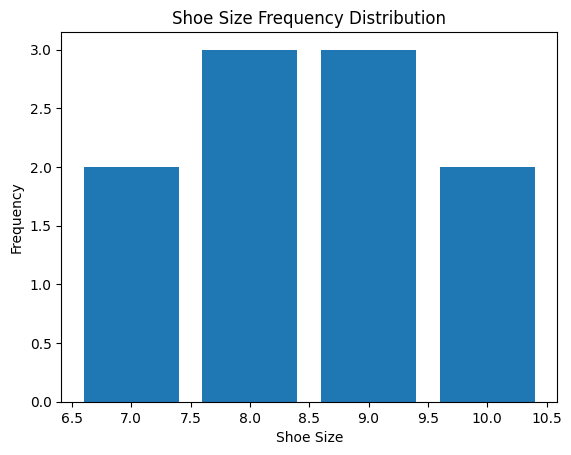

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


file_path = 'shoe_size,quantity.csv'
df = pd.read_csv(file_path)

size_counts = df['shoe_size'].value_counts().sort_index()


print("Frequency Distribution Table:")
print(size_counts)


plt.bar(size_counts.index, size_counts.values)
plt.xlabel('Shoe Size')
plt.ylabel('Frequency')
plt.title('Shoe Size Frequency Distribution')
plt.show()